## Name : Pratik Sontakke
## College : Ajeenkya DY Patil University
## Task 3 : Number Recognition using MNIST dataset

In [1]:
!pip install tensorflow
!pip install keras 
!pip install pillow
!pip install numpy

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(len(x_train))

print(len(x_test))
# Finding the shape of individual sample
x_train[0].shape

60000
10000


(28, 28)

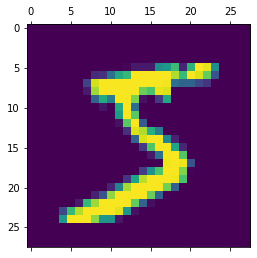

In [9]:
plt.matshow(x_train[0])

In [10]:
y_train[0]

5

In [11]:
# Show first 5 data
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
x_train.shape


(60000, 28, 28)

In [13]:
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [16]:
x_train_flattened.shape

(60000, 784)

In [17]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4665 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2663 - accuracy: 0.9255


In [18]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2713 - accuracy: 0.9238


[0.27134454250335693, 0.923799991607666]

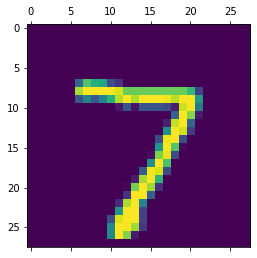

In [19]:
# Show the image
plt.matshow(x_test[0])

In [21]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.3185253e-02, 4.4277053e-07, 5.5982772e-02, 9.4701707e-01,
       3.2948705e-03, 1.1977718e-01, 1.3557038e-06, 9.9970567e-01,
       8.4853187e-02, 5.7806289e-01], dtype=float32)

In [22]:
# Find the maximum value using numpy
np.argmax(y_predicted[0])


7

In [23]:
# converting y_predicted from whole numbers to integers
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,    9,  921,   20,   10,    5,   11,    9,   37,    3],
       [   2,    0,   18,  927,    1,   25,    1,    8,   22,    6],
       [   2,    1,    5,    1,  937,    0,    8,    3,    9,   16],
       [   7,    3,    4,   27,   10,  799,    9,    4,   24,    5],
       [  13,    3,    9,    1,    8,   21,  899,    2,    2,    0],
       [   1,    8,   25,    9,   10,    1,    0,  941,    1,   32],
       [   9,   10,    6,   22,   10,   39,    8,   10,  854,    6],
       [  11,    7,    1,   12,   58,   10,    0,   25,    7,  878]])>

Text(69.0, 0.5, 'Truth')

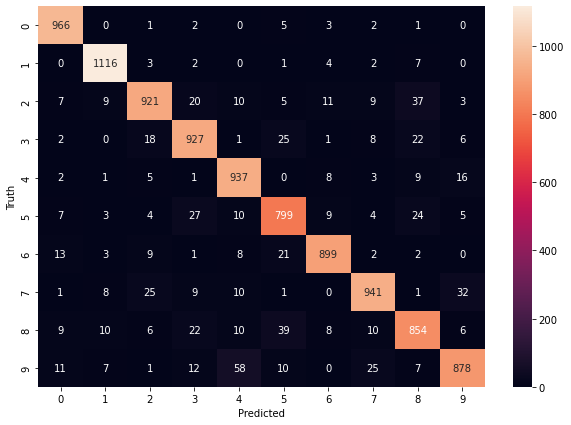

In [25]:
#visualization
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2715 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1253 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0681 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0546 - accuracy: 0.9829


In [27]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9758


[0.07949236035346985, 0.9757999777793884]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

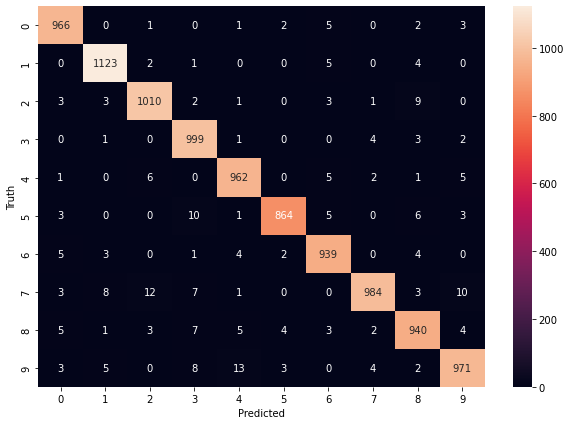

In [29]:
#using confusion matrix for validation
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')